# Analysis of Traffic Volume per Time Period
This notebook visualizes the output of our CV model for each commute period (i.e. morning, noon, and evening).

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
morning = pd.read_csv('report_morning.csv')
morning.dropna(axis=0, inplace=True)
morning['time'] = morning['time'].astype(int) * 2
morning.describe().vehicles

count    2199.000000
mean        0.195998
std         0.450722
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         3.000000
Name: vehicles, dtype: float64

In [2]:
noon = pd.read_csv('report_noon.csv')
noon.dropna(axis=0, inplace=True)
noon['time'] = noon['time'].astype(int) * 2


evening = pd.read_csv('report_evening.csv')
evening.dropna(axis=0, inplace=True)
evening['time'] = evening['time'].astype(int) * 2

print(noon.describe().vehicles, evening.describe().vehicles)

count    2045.000000
mean        0.219560
std         0.475638
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         4.000000
Name: vehicles, dtype: float64 count    2142.000000
mean        0.232960
std         0.495073
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         3.000000
Name: vehicles, dtype: float64


### Cumulative Sum of Counts

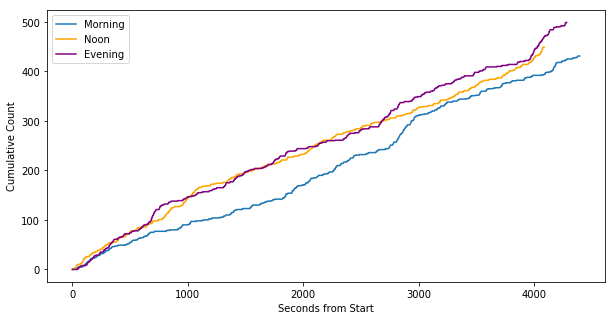

In [5]:
plt.figure(figsize=(10,5))
plt.ylabel('Cumulative Count')
plt.xlabel('Seconds from Start')
plt.plot(np.arange(len(morning.vehicles))*2, np.cumsum(morning.vehicles), label='Morning')
plt.plot(np.arange(len(noon.vehicles))*2, np.cumsum(noon.vehicles), c='orange', label='Noon')
plt.plot(np.arange(len(evening.vehicles))*2, np.cumsum(evening.vehicles), c='purple', label='Evening')
plt.legend()

### Rolling window summation

In [6]:
window_morning = morning.copy()
window_morning['time'] = (window_morning.time/300).astype(int)*5 # convert to 5 minute windows
window_morning = window_morning.groupby('time').sum()
window_morning.head()

,vehicles
time,
0,38
5,26
10,16
15,22
20,21


In [7]:
window_noon = noon.copy()
window_noon['time'] = (window_noon.time/300).astype(int)*5 # convert to 5 minute windows
window_noon = window_noon.groupby('time').sum()

window_evening = evening.copy()
window_evening['time'] = (window_evening.time/300).astype(int)*5 # convert to 5 minute windows
window_evening = window_evening.groupby('time').sum()

print(window_noon.head(), window_evening.head())

      vehicles
time          
0           50
5           35
10          42
15          44
20          25       vehicles
time          
0           43
5           40
10          55
15          21
20          38


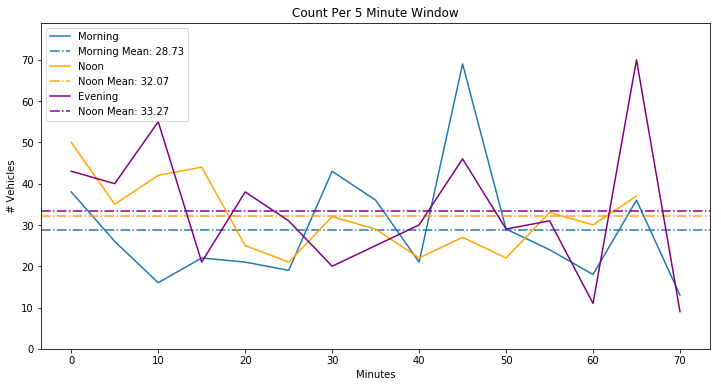

In [8]:
plt.figure(figsize=(12,6))
plt.ylim(0, max(window_morning.vehicles)+10)
plt.title('Count Per 5 Minute Window')
plt.ylabel('# Vehicles')
plt.xlabel('Minutes')

plt.plot(np.arange(len(window_morning.vehicles))*5, window_morning.vehicles, label='Morning')
plt.axhline(window_morning.vehicles.mean(), linestyle='-.', label='Morning Mean: {:.2f}'.format(window_morning.vehicles.mean()))

plt.plot(np.arange(len(window_noon.vehicles))*5, window_noon.vehicles, c='orange', label='Noon')
plt.axhline(window_noon.vehicles.mean(), linestyle='-.', c='orange', label='Noon Mean: {:.2f}'.format(window_noon.vehicles.mean()))

plt.plot(np.arange(len(window_evening.vehicles))*5, window_evening.vehicles, c='purple', label='Evening')
plt.axhline(window_evening.vehicles.mean(), linestyle='-.', c='purple', label='Noon Mean: {:.2f}'.format(window_evening.vehicles.mean()))

plt.legend()

Interpretation: The morning was slightly more variable and had a peak around 7:45 (~70 detected vehicles during that window). However, it had a lower mean than its noon counterpart. 